In [ ]:

import pandas as pd
import numpy as np
import string
import re


In [ ]:
df = pd.read_csv("bbc-news-data.csv",sep = "\t")
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
X = df['content']
y = df['category']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df


,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

vectorizer = TfidfVectorizer(preprocessor=preprocess_text)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
clf = LinearSVC()
clf.fit(X_train_vect, y_train)

LinearSVC()

In [ ]:
y_pred = clf.predict(X_test_vect)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97       115
entertainment       0.97      0.99      0.98        72
     politics       0.96      0.95      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.98      0.99      0.98        80

     accuracy                           0.98       445
    macro avg       0.97      0.98      0.97       445
 weighted avg       0.98      0.98      0.98       445



In [ ]:
new_text = 'This is a new article about technology'
new_text_vect = vectorizer.transform([preprocess_text(new_text)])
predicted_category = clf.predict(new_text_vect)[0]
print(predicted_category)

tech


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000]}
svc = LinearSVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_vect, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000]})

In [ ]:
y_pred = clf.predict(X_test_vect)
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       0.96      0.96      0.96       115
entertainment       0.97      0.99      0.98        72
     politics       0.95      0.95      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.97      0.97      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



In [ ]:
new_text = 'This is a new article about technology'
new_text_vect = vectorizer.transform([preprocess_text(new_text)])
predicted_category = clf.predict(new_text_vect)[0]
print(predicted_category)

tech


In [ ]:
print(clf.best_params_)

{'C': 10, 'max_iter': 100}


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("bbc-news-data.csv",sep = "\t")
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
param_range = np.logspace(-3, 3, 7)

In [ ]:
model = Ridge()


In [ ]:
train_scores, test_scores = validation_curve(
    model, X, y, param_name='alpha', param_range=param_range,
    cv=5, scoring='neg_mean_squared_error')


In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


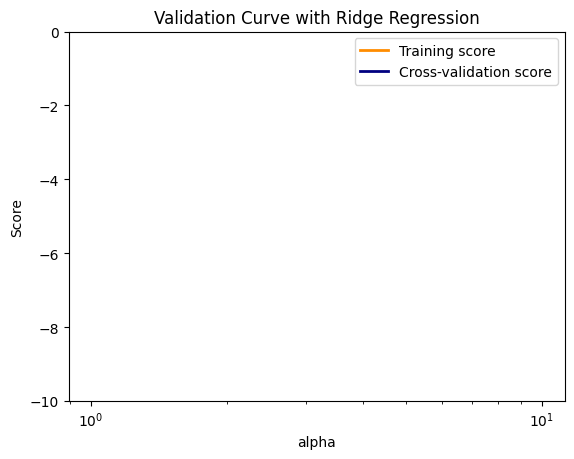

In [ ]:
plt.title("Validation Curve with Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(-10, 0)
lw = 2
plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()